In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile
import pandas as pd

In [2]:
# Load the data
fs, data = wavfile.read('1.short.wav')

In [3]:
# Get track.
track = data.T

In [4]:
pd.DataFrame(track).describe()

,0
count,280512.000000
mean,-37.329102
std,4895.153570
min,-18434.000000
25%,-1497.000000
50%,-9.000000
75%,1288.000000
max,18425.000000


In [5]:
# Normalize to (-1,1).
normalized = [(x/2**8.)*2-1 for x in track]

In [6]:
df = pd.DataFrame(track)
df = (df - df.mean()) / (df.max() - df.min())
df.describe()
normalized = df[0].tolist()

In [7]:
# Calculate FFT.
fourier = fft(normalized)

In [8]:
fourier[-1]

(-35.04058439287317+80.14708263942009j)

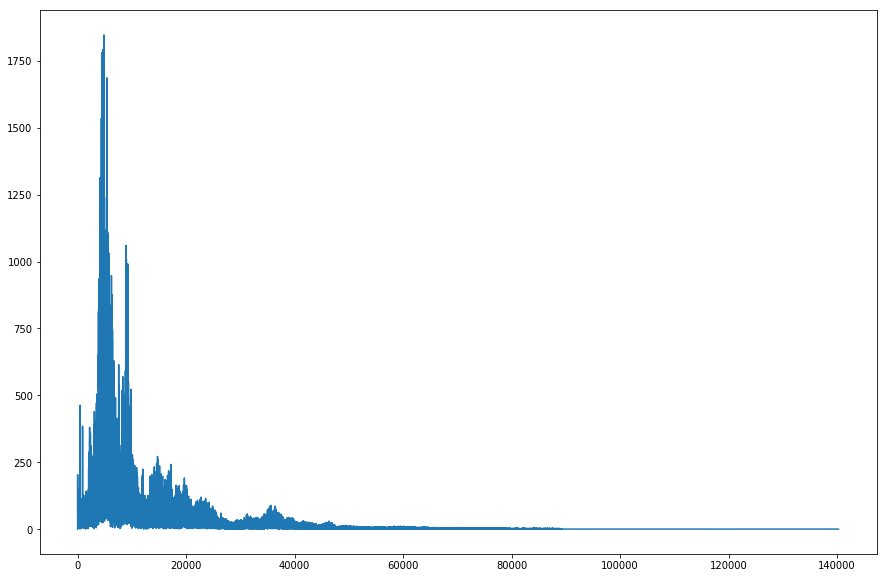

In [9]:
# Plot half.
halfpoint = int(len(fourier)/2)
plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(abs(fourier[:(halfpoint-1)]))
plt.show()

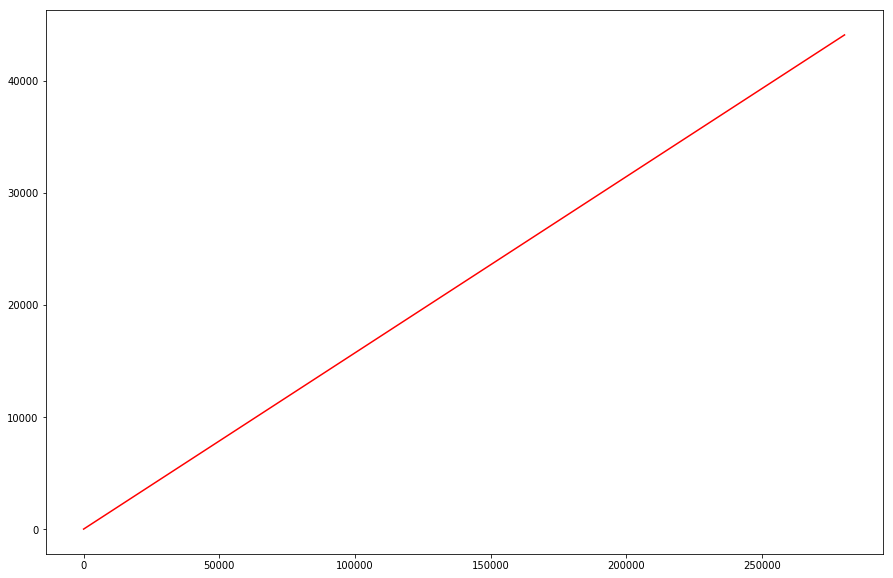

In [10]:
# Spectrum.
freq = 44100
k = np.arange(len(data))
T = len(data)/freq
spectrum = k/T

plt.plot(spectrum, 'r')
plt.show()

In [11]:
import librosa
from librosa import display as rosadisp

In [12]:
y, sr = librosa.load('1.short.wav')

In [22]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=16000)

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


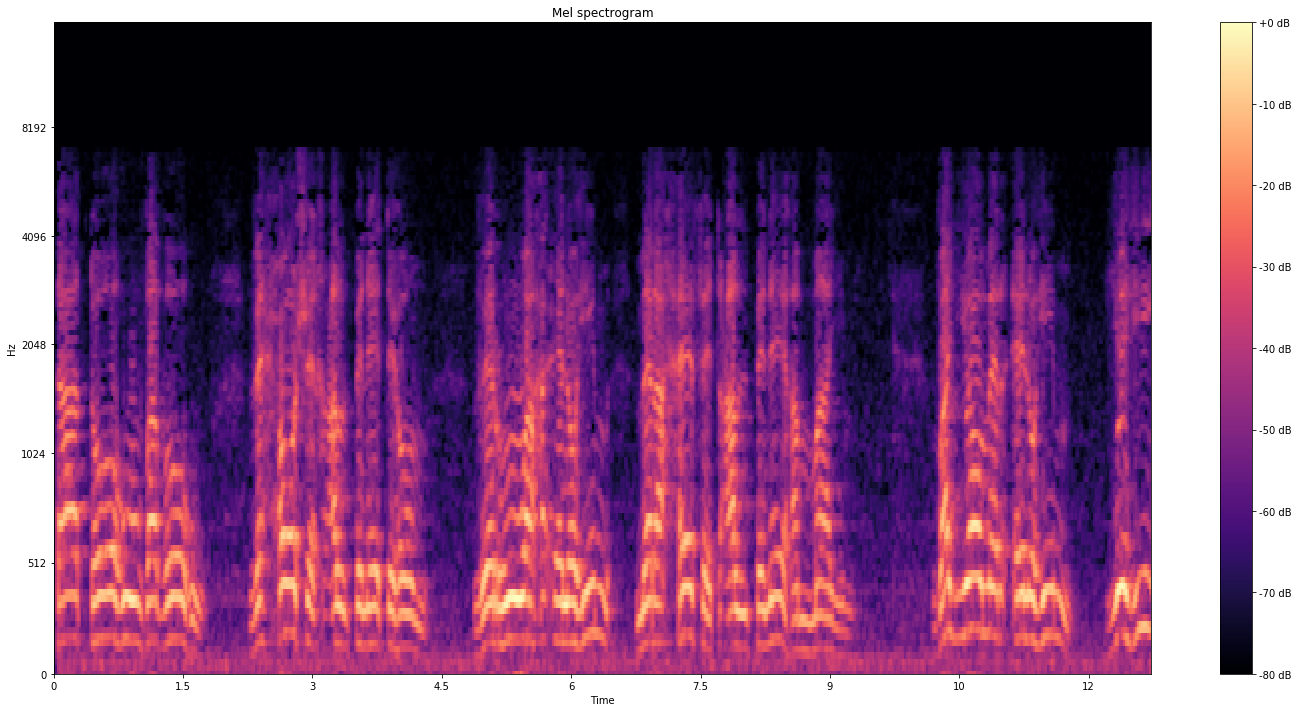

In [25]:
plt.figure(figsize=(20, 10))
rosadisp.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', fmax=16000,
                         x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [26]:
S_full, phase = librosa.magphase(librosa.stft(y))

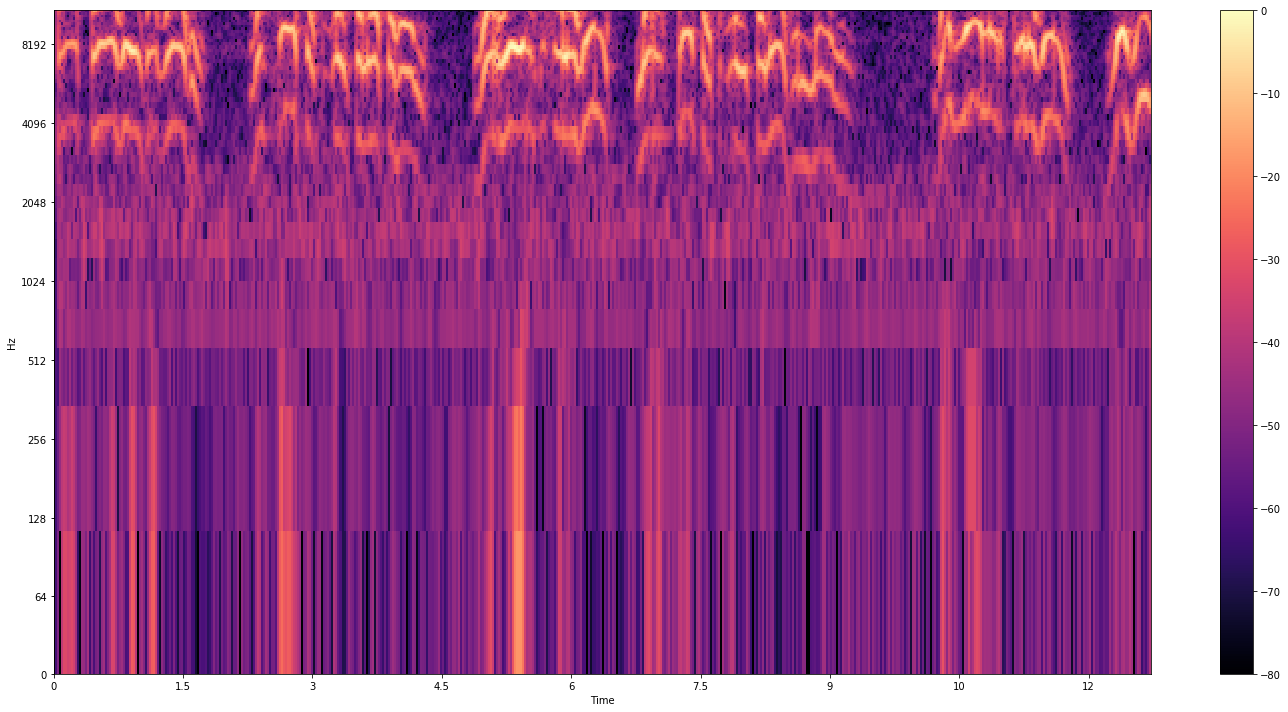

In [41]:
plt.figure(figsize=(20, 10))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:49], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()